In [1]:
import os
os.getcwd()

'C:\\Users\\Suraj\\Desktop\\ML'

In [2]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To get the dataset from CSV file
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
#To show the starting first 5 data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#To check total no. of data (rows,columns) in the dataset
df.shape

(10000, 14)

In [6]:
#But here 'RowNumber', 'CustomerID' , 'Surname' are unwanted columns so delete them
# Remove three columns as index base
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)

In [7]:
#To show the starting first 5 data
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#To check for Null values in dataset
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#To recheck for Null values
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
#Check Unique values in 'Geography' column
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
#Check Unique values in 'Gender' column
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
#Check for whether data is balanced or Imbalanced
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
#We will need to balanced the data before giving to Machine Learning Algorithm because it will
#affect the accuracy of the model. After scaling we will balanced the data.

In [14]:
#Separate object type data and numeric type data from dataset df
df_num=df.select_dtypes(('float64','int64')) #Numeric type data
df_cat=df.select_dtypes('object') #Object type data

In [15]:
df_cat.dtypes

Geography    object
Gender       object
dtype: object

In [16]:
df_num.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
#Apply LableEncoder for converts object type data into numeric type
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
print(column)

Index(['Geography', 'Gender'], dtype='object')


In [18]:
for col in column:
#Create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [20]:
#To join both dataset df_num and df_cat and hold on new datafrome df_new
df_new=pd.concat([df_num,df_cat],axis=1)
#To show the starting first 5 data

In [21]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

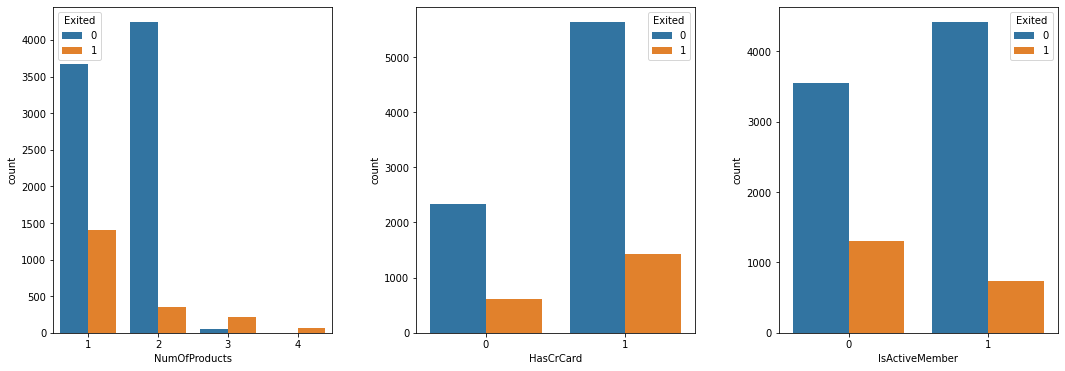

In [22]:
_,ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

In [23]:
#Customer with 3 or 4 products are higher chances to Churn (Exit)

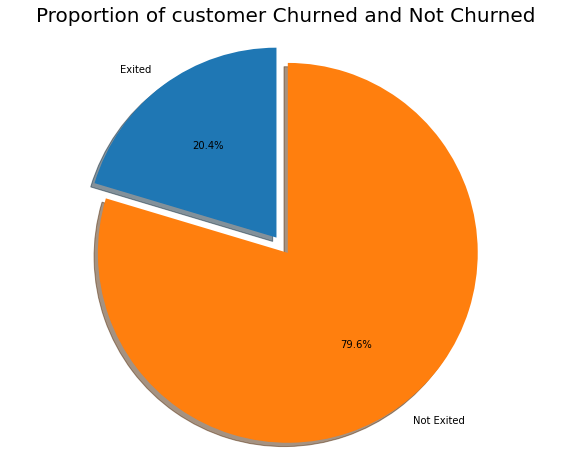

In [24]:
labels = 'Exited', 'Not Exited'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Churned and Not Churned", size = 20)
plt.show()

In [25]:
#Select input and output from dataset
X=df_new.drop("Exited",axis=1) #input
Y=df_new['Exited'] #output

In [26]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
#Scaling
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #fit is used to train the model
X_test=ss.transform(X_test)

In [28]:
#Create user defined function
def create_model(model): #Here model passing argument(object)
    model.fit(X_train,Y_train) #Train the model with 70% data
    Y_pred=model.predict(X_test) #Test the model with 30% data
    print(classification_report(Y_test,Y_pred)) #To generate Classification report
    print(confusion_matrix(Y_test,Y_pred)) #To generate Confusion matrix
    return model

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
#Previously we have find that the data is imbalanced so we will need to balanced it before
#For Balancing the data we need to apply Sampling Technnique
#We will apply RandomOverSampler which is a type of Sampling Technique
#RandomOverSampler : inbuilt class : to increase means create duplicate records of minorit

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
#before apply randomoversampler
Y_train.value_counts() #check if not balance

0    5590
1    1410
Name: Exited, dtype: int64

In [33]:
#Apply RandomOverSampler
#First create the object of class RandomOverSampler
ros=RandomOverSampler()

In [34]:
X_train,Y_train=ros.fit_resample(X_train,Y_train)
#here make a duplicate record from existing record of minority class

In [35]:
#Before apply randomoversample, check testing data
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [36]:
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [37]:
#Here data is balanced now so we can give our data to Machine Learning Algorithms

# LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1719  654]
 [ 811 1562]]


In [40]:
'''NOTE: Here LogisticRegression Algorithm gives about 0.69 Accuracy score. But here in this case
we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1
is 0.66.
Lets, test the data with other models(Algorithms).
'''

'NOTE: Here LogisticRegression Algorithm gives about 0.69 Accuracy score. But here in this case\nwe have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1\nis 0.66.\nLets, test the data with other models(Algorithms).\n'

# DecisionTreeClassifier

In [41]:
#Now perform dataset with the help of DecisionTreeClassifier
#Call DecisionTreeClassifier class

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
#create object od decisiontreeclassifier
dt=DecisionTreeClassifier()

In [44]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73      2373
           1       0.79      0.50      0.61      2373

    accuracy                           0.68      4746
   macro avg       0.71      0.68      0.67      4746
weighted avg       0.71      0.68      0.67      4746

[[2051  322]
 [1178 1195]]


In [45]:
#SHOW THE INFORMATION GAIN OF ALL INPUT FEATURES
dt.feature_importances_

array([0.14267381, 0.25833578, 0.07175402, 0.14196481, 0.12511225,
       0.01283312, 0.04203217, 0.14530951, 0.03893188, 0.02105264])

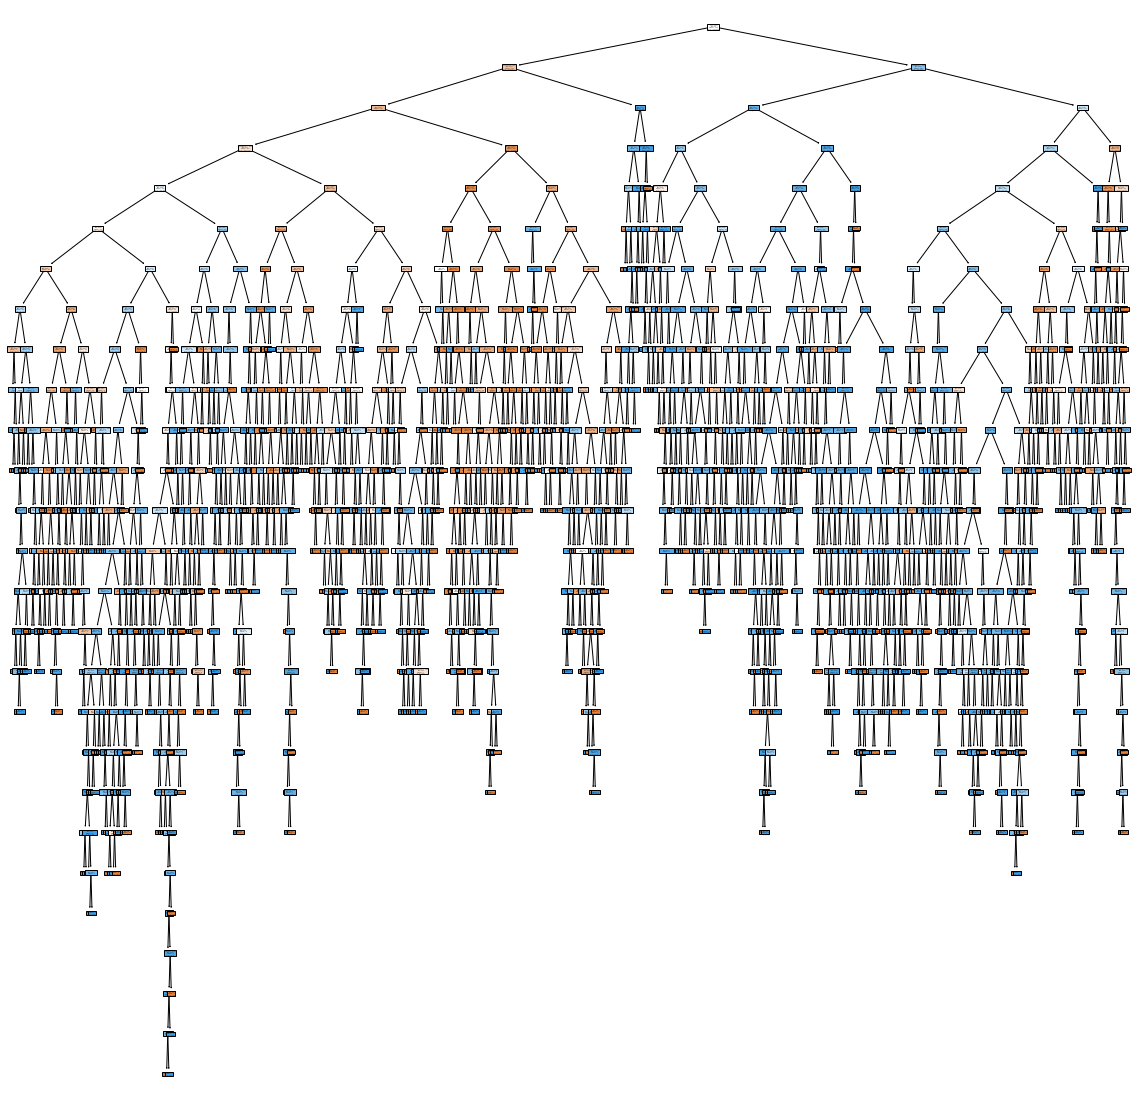

In [46]:
#SHOW THE TREE
x=df_new
from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [47]:
#Here clearly understood that the model is overfit ,so reduced the overfitting situation w
#How to reduced a overfitting situation By using the Pruning technique There are 2 types o
#1. max_depth : inbulit parameter
#2. min_samples_leaf : inbuilt parameter

In [48]:
#1.max_depth parameter
#Create object of DecisionTreeClassifier class and pass the parameter
#max_depth
dt1=DecisionTreeClassifier(max_depth=5,random_state=1)

In [49]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2373
           1       0.81      0.66      0.73      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.75      4746
weighted avg       0.76      0.75      0.75      4746

[[1999  374]
 [ 797 1576]]


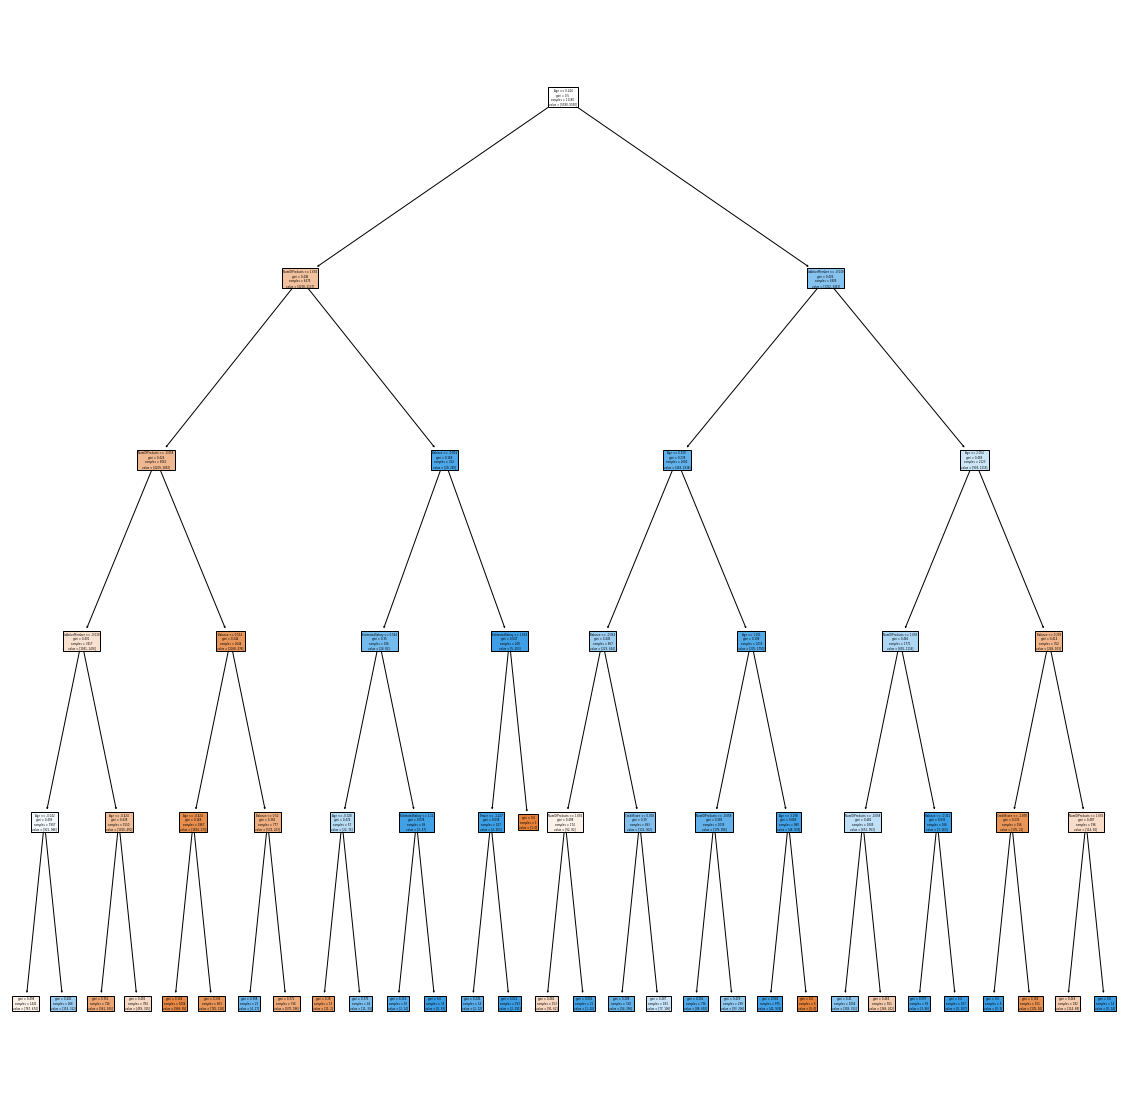

In [50]:
x=df_new
from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [51]:
#Use second pruning tech .
#min_samples_leaf : Atleast 45-50 or more

In [52]:
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method
#min_samples_leaf =50 or more means not less than=45-50

In [53]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2373
           1       0.77      0.72      0.74      2373

    accuracy                           0.75      4746
   macro avg       0.75      0.75      0.75      4746
weighted avg       0.75      0.75      0.75      4746

[[1863  510]
 [ 676 1697]]


In [54]:
'''NOTE: Here DecisionTreeClassifier Algorithm without Pruning technique gives about 0.69
Accuracy score. But here in this case we have to focus on recall score, here recall score of Class
0 is 0.87 and recall score of Class 1 is 0.50.
Here DecisionTreeClassifier Algorithm with Pruning technique (max_depth parameter) gives
about 0.75 Accuracy score. But here in this case we have to focus on recall score, here recall
score of Class 0 is 0.82 and recall score of Class 1 is 0.67.
Here DecisionTreeClassifier Algorithm with Pruning technique with (min_samples_leaf) gives
about 0.74 Accuracy score. But here in this case we have to focus on recall score, here recall
score of Class 0 is 0.79 and recall score of Class 1 is 0.69.
Lets, test the data with other models(Algorithms).'''

'NOTE: Here DecisionTreeClassifier Algorithm without Pruning technique gives about 0.69\nAccuracy score. But here in this case we have to focus on recall score, here recall score of Class\n0 is 0.87 and recall score of Class 1 is 0.50.\nHere DecisionTreeClassifier Algorithm with Pruning technique (max_depth parameter) gives\nabout 0.75 Accuracy score. But here in this case we have to focus on recall score, here recall\nscore of Class 0 is 0.82 and recall score of Class 1 is 0.67.\nHere DecisionTreeClassifier Algorithm with Pruning technique with (min_samples_leaf) gives\nabout 0.74 Accuracy score. But here in this case we have to focus on recall score, here recall\nscore of Class 0 is 0.79 and recall score of Class 1 is 0.69.\nLets, test the data with other models(Algorithms).'

# RandomForestClassifier

In [55]:
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier
#ensemble means to train the same dataset from multiple alorithm
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10)

In [56]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      2373
           1       0.87      0.50      0.63      2373

    accuracy                           0.71      4746
   macro avg       0.76      0.71      0.70      4746
weighted avg       0.76      0.71      0.70      4746

[[2197  176]
 [1196 1177]]


In [57]:
'''NOTE: Here RandomForestClassifier Algorithm gives about 0.71 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.92 and recall score of
Class 1 is 0.50.
Lets, test the data with other models(Algorithms)'''

'NOTE: Here RandomForestClassifier Algorithm gives about 0.71 Accuracy score. But here in this\ncase we have to focus on recall score, here recall score of Class 0 is 0.92 and recall score of\nClass 1 is 0.50.\nLets, test the data with other models(Algorithms)'

# BoostingTechnique

In [58]:
#Ensembling technique:
#1. Random forest tree
#2. Boosting technique
#A. ADA Boost : Adaptor Boosting
#B. Gradient Boost
#C. Extreme Gradient Boost

In [59]:
#Boosting Trechnique
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ada=AdaBoostClassifier(n_estimators=9,random_state=1)
#n_estimators means no. of decision tree (depend on no. of input features)

In [61]:
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2373
           1       0.78      0.76      0.77      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1876  497]
 [ 577 1796]]


In [62]:
#Call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=25,random_state=1)

In [64]:
#call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2373
           1       0.78      0.75      0.77      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1863  510]
 [ 583 1790]]


In [65]:
##Call Extreme Gradient Boosting (XGB) class from following package
from xgboost import XGBClassifier
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=30,reg_alpha=1)
#reg means regularation : lambda or alpha
#automatic overfitting : reg means regularation and alpha or lambda :
#hyperparameter
#1 means True
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2373
           1       0.82      0.71      0.76      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[2002  371]
 [ 689 1684]]


In [66]:
'''NOTE: Here ADA Boost Classifier Algorithm gives about 0.76 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.81 and recall score of
Class 1 is 0.72.
Here Gradient Boost Classifier Algorithm gives about 0.77 Accuracy score. But here in this case
we have to focus on recall score, here recall score of Class 0 is 0.79 and recall score of Class 1
is 0.74.
Here Extreme Gradient Classifier Algorithm gives about 0.77 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.80 and recall score of
Class 1 is 0.74.
Lets, test the data with other models(Algorithms)'''

'NOTE: Here ADA Boost Classifier Algorithm gives about 0.76 Accuracy score. But here in this\ncase we have to focus on recall score, here recall score of Class 0 is 0.81 and recall score of\nClass 1 is 0.72.\nHere Gradient Boost Classifier Algorithm gives about 0.77 Accuracy score. But here in this case\nwe have to focus on recall score, here recall score of Class 0 is 0.79 and recall score of Class 1\nis 0.74.\nHere Extreme Gradient Classifier Algorithm gives about 0.77 Accuracy score. But here in this\ncase we have to focus on recall score, here recall score of Class 0 is 0.80 and recall score of\nClass 1 is 0.74.\nLets, test the data with other models(Algorithms)'

# K-nn (KNeighborsClassifier) Algorithm:

In [67]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
#Create the object of KNeighborsClassifier
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2373
           1       0.72      0.64      0.67      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1776  597]
 [ 866 1507]]


In [68]:
#NOTE: Here KNeighborsClassifier Algorithm gives about 0.69 Accuracy score. But here in this
#case we have to focus on recall score, here recall score of Class 0 is 0.75 and recall score of
#Class 1 is 0.64.

# Support Vector Machine Algorithm 

In [69]:
#Apply Support vector machine
from sklearn.svm import LinearSVC
#Create object of LinearSVC class
svc=LinearSVC(random_state=1) #Hard margin by default means to outlier means
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1714  659]
 [ 811 1562]]


In [70]:
#Here accuracy is 0.71 which is good but we can more better means can be possible ,model i
#because there can be no error on training time but error on testing time ,
#what do we do , add some external error on training time if create a object of LinearSVC
#Soft margin means to reduced overfitting situation means some error add on
#training time
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.10)#soft margin
#always C means error parameter means to add external error on training time
#with the help of C parameter
#the value of C should be less than 1

In [71]:
#Call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1714  659]
 [ 811 1562]]


In [72]:
#Here data is non-linear so by changing the value of "C" above the accuracy not changes.
#if adding external error on training time but no any changes on score
#means given dataset in non-Linear can be possible , dataset is not linear means dataset i
#use Non-linear kernal function of SVM means 2 classes are not separatable with straight l
#There are 3 types of Kernal function of SVM
#1. Linear SVC : use for linear data
#2. Non-Linear SVC : use for non-linear data
#A. polynomial kernal function : increase the low dimension to high dimension
#B. radial basis kernal function
#Kernel function : Converts low dimension data to high dimension data
#if we have 1 D array then converts 2D array and we have 2D array then to converts 3D arra
#polynomial Kernel function
#radial basis Kernel function
#both are used for non-linear data
#Give data to Polynomial kernel function , call inbuilt class SVC
from sklearn.svm import SVC
#SVC means support vector classifier
#create object of SVC class
svc=SVC(random_state=1,kernel='poly')
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1714  659]
 [ 811 1562]]


In [73]:
#Give dataset to radial basis means kernel=rbf
svc2=SVC(random_state=1,kernel='rbf')
#call function
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      2373
           1       0.78      0.74      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1887  486]
 [ 621 1752]]


# Naive Bayes Classifier Algorithm

In [74]:
#Apply Navie Bayes Theorem (Classification theorem)
#1. Gaussian Naive Bayes theorem
from sklearn.naive_bayes import GaussianNB
#Inbuilt class GaussianNB

In [75]:
#create the object of class GaussianNB
#GaussianNB algorithm are applied on continuous Numerical value of input column
gnb=GaussianNB()
#call function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      2373
           1       0.75      0.69      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1828  545]
 [ 725 1648]]


In [76]:
#NOTE: Here Gaussian Naive Bayes Algorithm gives about 0.73 Accuracy score. But here in this
#case we have to focus on recall score, here recall score of Class 0 is 0.78 and recall score of
#Class 1 is 0.68.

# CONCLUSION : Hence, we will recommend Extreme Gradient Classifier Algorithm for the given Dataset of Bank Churn.